# Рубежный контроль №1: Методы обработки данных

**Курс**: Методы машинного обучения Программа: **Магистратура**, 2 семестр (Весна 2025)

**Выполнил**: Поддубный Михаил Николаевич

**Группа**: ИУ5-22М

**Вариант**: 8

## Задание

**Вариант 8:**

**Задача №8.**

Для набора данных проведите устранение пропусков для одного (произвольного) числового признака с использованием метода заполнения модой.

**Задача №28.**

Для набора данных для одного (произвольного) числового признака проведите обнаружение и замену (найденными верхними и нижними границами) выбросов на основе межквартильного размаха.

# 1. Подготовка данных и библиотек

Набор данных **planets** содержит информацию об экзопланетах, обнаруженных разными астрономическими методами. Он подходит для анализа числовых признаков и визуализации, так как содержит как числовые (масса планеты, орбитальный период), так и категориальные признаки (метод обнаружения, год).

In [89]:
import pandas as pd
import seaborn as sns

# Загрузка датасета
df = sns.load_dataset('planets')

### Анализ датасета

In [90]:
print('Первые 10 строк')
print(df.head(10))
print('Информация о структуре')
print(df.info())
print('Числовые колонки с пропусками')
print(df.isnull().sum())

Первые 10 строк
            method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009
5  Radial Velocity       1         185.840   4.80     76.39  2008
6  Radial Velocity       1        1773.400   4.64     18.15  2002
7  Radial Velocity       1         798.500    NaN     21.41  1996
8  Radial Velocity       1         993.300  10.30     73.10  2008
9  Radial Velocity       2         452.800   1.99     74.79  2010
Информация о структуре
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   ob

# 2. Задача №8: Устранение пропусков с помощью моды

Колонка "mass" имеет пропуски, будем заполнять ее

In [91]:
# Выбираем произвольную числовую колонку с пропусками
target_col = 'mass'

# Считаем моду
mode_value = df[target_col].mode()[0]

print(f"Пропуски в колонке '{target_col}' заменены на моду: {mode_value}")

# Заполняем пропуски
df[target_col] = df[target_col].fillna(mode_value)

print(f"Осталось пропусков в '{target_col}': {df[target_col].isnull().sum()}")

Пропуски в колонке 'mass' заменены на моду: 1.8
Осталось пропусков в 'mass': 0


### Проверка
Изначально в записи номер 7 был пропуск в колонке "mass", проверим сейчас

In [92]:
df.head(10)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
5,Radial Velocity,1,185.840,4.80,76.39,2008
6,Radial Velocity,1,1773.400,4.64,18.15,2002
7,Radial Velocity,1,798.500,1.80,21.41,1996
8,Radial Velocity,1,993.300,10.30,73.10,2008
9,Radial Velocity,2,452.800,1.99,74.79,2010


## Сейчас там вместо NaN число 1.8, значит все успешно заполняется

# 3. Задача №28: Обнаружение и замена выбросов на основе межквартильного размаха

In [93]:
# Для колонки "mass"
col_for_outliers = 'mass'

# Вычисление межквартильного размаха (IQR)
# Q1 (первый квартиль) — это значение, которое разделяет 25% наименьших данных.
Q1 = df[col_for_outliers].quantile(0.25)
# Q3 (третий квартиль) — это значение, которое разделяет 25% наибольших данных.
Q3 = df[col_for_outliers].quantile(0.75)
IQR = Q3 - Q1

# Вычисление границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Статистика до замены выбросов:")
print(df[col_for_outliers].describe())

# Применение метода замены выбросов
df[col_for_outliers] = df[col_for_outliers].clip(lower=lower_bound, upper=upper_bound)

print("\nСтатистика после замены выбросов:")
print(df[col_for_outliers].describe())

print(f"Выбросы в '{col_for_outliers}' заменены на границы: [{lower_bound}, {upper_bound}]")

Статистика до замены выбросов:
count    1035.000000
mean        2.215436
std         2.719594
min         0.003600
25%         1.285000
50%         1.800000
75%         1.800000
max        25.000000
Name: mass, dtype: float64

Статистика после замены выбросов:
count    1035.000000
mean        1.628433
std         0.646249
min         0.512500
25%         1.285000
50%         1.800000
75%         1.800000
max         2.572500
Name: mass, dtype: float64
Выбросы в 'mass' заменены на границы: [0.5125000000000003, 2.5725]


# 4. Построение гистограммы для произвольной числовой колонки

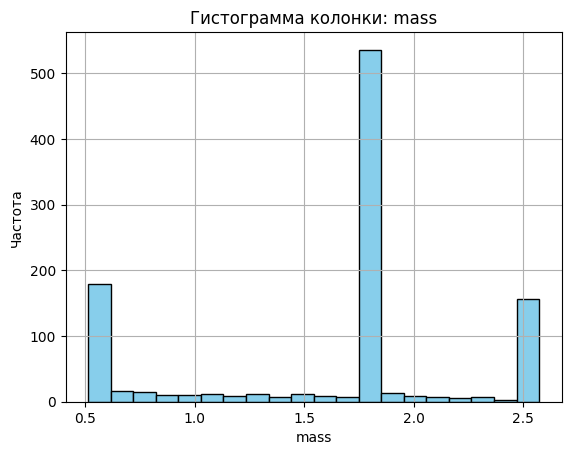

In [94]:
import matplotlib.pyplot as plt

hist_col = target_col  # Или выберите любую
plt.hist(df[hist_col].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title(f'Гистограмма колонки: {hist_col}')
plt.xlabel(hist_col)
plt.ylabel('Частота')
plt.grid(True)
plt.show()